In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [150]:
df = pd.read_csv('data.csv', encoding='latin-1', sep=';')

- Sử dụng 3 cột 6,7,8

In [151]:
columns = ['6', '7', '8']

In [152]:
data = df[columns]

## Sử dụng HMM để phân tích chuỗi với 2 trạng thái ẩn

In [153]:
from hmmlearn.hmm import GaussianHMM

- Lấy ra các quan sát từ dữ liệu: observations

In [154]:
observations = data.values

- Định nghĩa mô hình HMM với 2 trạng thái ẩn

In [155]:
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)

In [156]:
model.fit(observations)

GaussianHMM(n_components=2, n_iter=1000)

In [157]:
hidden_states = model.predict(observations)

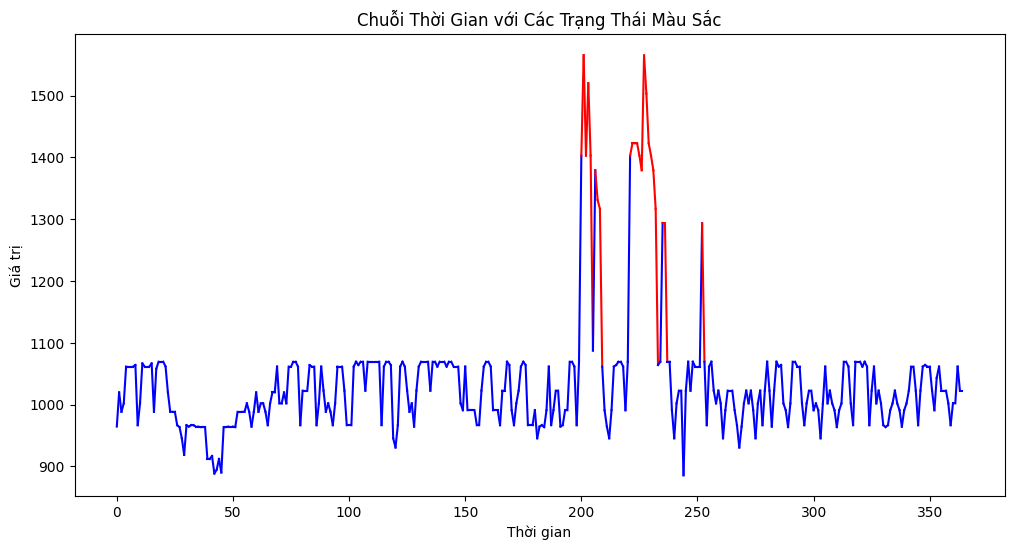

In [158]:

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ đường với màu sắc dựa trên giá trị số nguyên
for i in range(len(data) - 1):
    plt.plot(data.index[i:i+2], data['6'][i:i+2], color='blue' if hidden_states[i] == 0 else 'red')

plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.title('Chuỗi Thời Gian với Các Trạng Thái Màu Sắc')
plt.show()

- Vẽ biểu đồ hiển thị trạng thái của dữ liệu trong chuỗi thời gian, trong đó mỗi trạng thái được mã hóa bằng một màu sắc cụ thể.

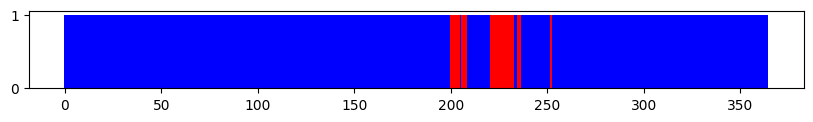

In [159]:
state2color = {} 
state2color['0'] = 'blue'
state2color['1'] = 'red'

def plot_price(samples, state2color): 
    colors = [state2color[str(x)] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    
plot_price(hidden_states, state2color)

### Sử dụng HMM với 1 số điều chỉnh về transmat, start prob, emission prob

In [160]:
transmat = np.array([[0.9, 0.1], 
                     [0.7, 0.3]])

# Xác suất bắt đầu cho 2 trạng thái
start_prob = np.array([0.6, 0.4])

emission_probs = np.array([[0.4, 0.4, 0.1, 0.1], 
                           [0.1, 0.1, 0.6, 0.2]])

# Tạo mô hình HMM với 2 trạng thái
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs

In [161]:
model.fit(observations)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


GaussianHMM(n_components=2, n_iter=1000)

- Dự đoán trạng thái ẩn cho các quan sát được cung cấp bằng cách sử dụng mô hình HMM đã được huấn luyện

In [162]:
hidden_states = model.predict(observations)

In [163]:
hidden_states

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

-  Biểu đồ hiển thị trạng thái ẩn của dữ liệu trong mô hình HMM

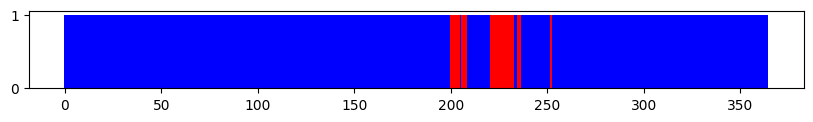

In [164]:
plot_price(hidden_states, state2color)

## Kalman Filter

In [165]:
from pykalman import KalmanFilter

In [166]:
kf = KalmanFilter(initial_state_mean=np.mean(observations, axis=0), n_dim_obs=3)

state_means, state_covariances = kf.em(observations, n_iter=5).filter(observations)

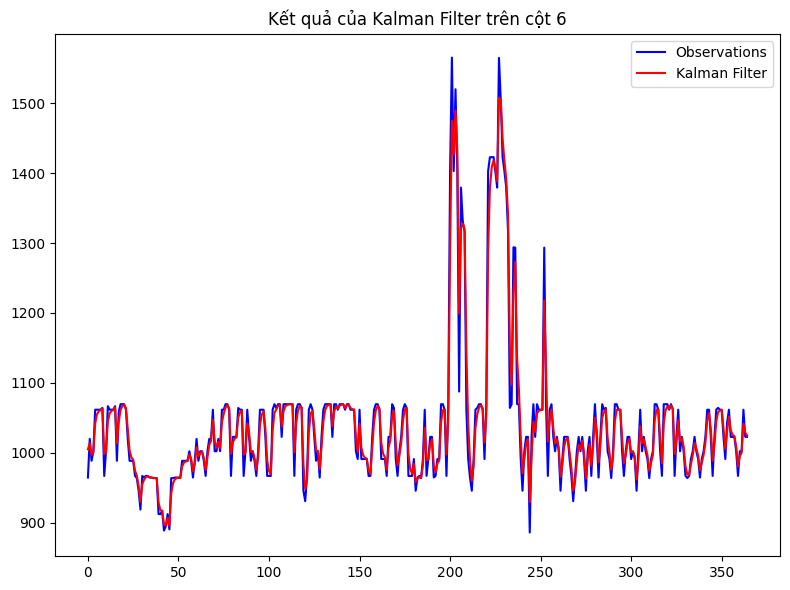

In [167]:
plt.figure(figsize=(8, 6))

plt.plot(range(observations.shape[0]), observations[:, 0], 'blue', label='Observations')
plt.plot(range(observations.shape[0]), state_means[:, 0], 'red', label='Kalman Filter')
plt.title(f'Kết quả của Kalman Filter trên cột 6')
plt.legend()

plt.tight_layout()
plt.show()